<a href="https://colab.research.google.com/github/prakharsrivastava/powerbi/blob/main/Data_Science_on_Google_Cloud_Platform_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/chapter2/


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/chapter2


In [ ]:
#flight data
https://raw.githubusercontent.com/GoogleCloudPlatform/data-science-on-gcp/main/04_streaming/transform/flights_sample.json

In [115]:
!pip install findspark 
!pip install  pyspark




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("architectinaction.com").getOrCreate()

In [117]:
%pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.cloud import bigquery

In [119]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [120]:
%%sql
sqlite:///mydb_

'Connected: @mydb_'

In [121]:
import pandas as pd
airports = pd.read_csv('airports.csv',low_memory=False,nrows=3)
flight = pd.read_json('flights_sample.json',lines=True)

In [122]:
sparkAirportsDF=spark.createDataFrame(airports)
sparkFlightDF=spark.createDataFrame(flight)

In [123]:
sparkAirportsPandas = sparkAirportsDF.toPandas()
sparkFlightDF

DataFrame[FL_DATE: string, UNIQUE_CARRIER: string, ORIGIN_AIRPORT_SEQ_ID: bigint, ORIGIN: string, DEST_AIRPORT_SEQ_ID: bigint, DEST: string, CRS_DEP_TIME: bigint, DEP_TIME: timestamp, DEP_DELAY: double, TAXI_OUT: double, WHEELS_OFF: string, WHEELS_ON: string, TAXI_IN: double, CRS_ARR_TIME: bigint, ARR_TIME: timestamp, ARR_DELAY: double, CANCELLED: boolean, DIVERTED: boolean, DISTANCE: bigint]

In [ ]:
sparkFlightDF.show()

+---------+---------+
|ARR_DELAY|DEP_DELAY|
+---------+---------+
|      -18|       -5|
|      -19|       -4|
+---------+---------+



In [124]:

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
flight.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [125]:
import pandas as pd
df = pd.read_json('flights_sample.json',lines=True)

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
df.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [126]:
%%sql
SELECT
 *
FROM flights_view_

 * sqlite:///mydb_
Done.


FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_SEQ_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE
2015-04-28,EV,1000101,ABE,1000101,ATL,1600,1970-01-01 00:25:55,-5.0,7.0,1602,1747,4.0,1809,1970-01-01 00:29:11,-18.0,0,0,692
2015-11-05,DL,1000101,ABE,1000101,ATL,600,1970-01-01 00:09:16,-4.0,12.0,0608,0749,10.0,818,1970-01-01 00:12:39,-19.0,0,0,692
2015-08-25,EV,1013503,ABE,1143302,DTW,1726,1970-01-01 00:28:59,13.0,11.0,1750,1906,3.0,1905,1970-01-01 00:31:49,4.0,0,0,425
2015-12-17,EV,1013503,ABE,1393004,ORD,651,1970-01-01 00:10:42,-9.0,9.0,0651,0743,9.0,811,1970-01-01 00:12:32,-19.0,0,0,655
2015-03-04,MQ,1013603,ABI,1129803,DFW,1549,None,None,None,,,None,1640,None,None,1,0,158
2015-08-08,MQ,1013603,ABI,1129804,DFW,1508,1970-01-01 00:24:17,-11.0,8.0,1505,1538,7.0,1603,1970-01-01 00:25:45,-18.0,0,0,158
2015-07-23,MQ,1013603,ABI,1129804,DFW,1823,1970-01-01 00:30:51,28.0,6.0,1857,1931,45.0,1924,1970-01-01 00:33:36,52.0,0,0,158
2015-02-01,DL,1014003,ABQ,1039705,ATL,1318,1970-01-01 00:21:52,-6.0,13.0,1325,1748,14.0,1814,1970-01-01 00:30:02,-12.0,0,0,1269
2015-04-25,WN,1014003,ABQ,1082103,BWI,1125,1970-01-01 00:18:41,-4.0,14.0,1135,1644,6.0,1710,1970-01-01 00:27:30,-20.0,0,0,1670
2015-03-27,WN,1014003,ABQ,1125903,DAL,1920,1970-01-01 00:31:59,-1.0,7.0,1926,2146,4.0,2155,1970-01-01 00:35:50,-5.0,0,0,580


In [ ]:
%%sql
SELECT
  -18/COUNT(arr_delay) AS frac_delayed
FROM flights_view_

 * sqlite:///mydb_
Done.


frac_delayed
0


In [ ]:
df.describe()

,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DISTANCE
count,3.200000e+01,3.200000e+01,32.000000,30.000000,30.000000,30.000000,32.000000,30.000000,32.000000
mean,1.013112e+06,1.229000e+06,1197.812500,1.133333,10.033333,8.033333,1365.531250,-4.200000,574.437500
std,3.428375e+03,1.441868e+05,468.959689,12.389465,3.316452,7.613433,472.707233,15.772958,328.912572
min,1.000101e+06,1.000101e+06,535.000000,-12.000000,5.000000,2.000000,700.000000,-20.000000,89.000000
25%,1.014003e+06,1.128377e+06,783.750000,-6.000000,8.000000,5.000000,891.250000,-13.750000,343.750000
50%,1.014003e+06,1.136553e+06,1215.000000,-2.500000,9.000000,6.000000,1345.000000,-7.500000,580.000000
75%,1.014003e+06,1.382954e+06,1627.500000,1.750000,12.750000,8.750000,1816.750000,0.750000,677.000000
max,1.015502e+06,1.467903e+06,1940.000000,46.000000,19.000000,45.000000,2155.000000,52.000000,1670.000000


In [ ]:
sparkFlightDF=sparkFlightDF.select("ARR_DELAY","DEP_DELAY")


In [ ]:
from pyspark.sql.functions import *
sparkFlightDF=sparkFlightDF.withColumn("ontime",when(col("ARR_DELAY")>-10,"True").when(col("DEP_DELAY")>-10,"True").otherwise("false") )
sparkFlightDF.show()

In [ ]:
sparkFlightDF=sparkFlightDF.toPandas()

In [ ]:
sparkFlightDF

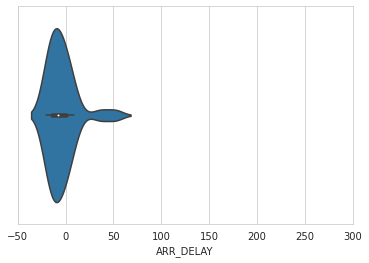

In [ ]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.5)
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', inner='box', orient='h')
ax.axes.set_xlim(-50, 300);

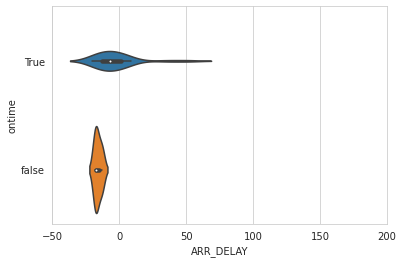

In [ ]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200);

In [ ]:
#https://github.com/GoogleCloudPlatform/data-science-on-gcp/blob/main/05_bqnotebook/exploration.ipynb

In [ ]:
import pandas as pd
df = pd.read_sql("""
            SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
%%sql
SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY

 * sqlite:///mydb_
Done.


DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
1.0,-0.5,2.25,2
2.0,-10.0,0.0,1
6.0,0.0,0.0,1
10.0,2.0,0.0,1
13.0,6.5,6.25,2
18.0,8.0,0.0,1
28.0,52.0,0.0,1
46.0,36.0,0.0,1


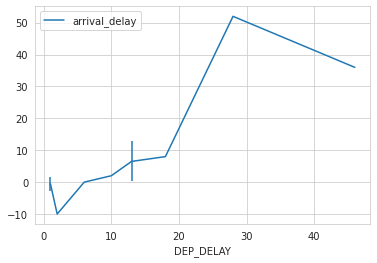

In [ ]:
ax = df.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

In [ ]:
%%sql
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY

 * sqlite:///mydb_
(sqlite3.OperationalError) no such function: APPROX_QUANTILES
[SQL: SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
import pandas as pd
df = pd.read_sql("""
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
z=x-mean/s.d
x=
z*s.d+mean
z score for 30% probablity is 0.52

In [112]:
df['arr_delay_30'] = (0.52 * df['stddev_arrival_delay']) \
             + df['arrival_delay']
x=df['arr_delay_30']
x

0     0.67
1   -10.00
2     0.00
3     2.00
4     9.75
5     8.00
6    52.00
7    36.00
Name: arr_delay_30, dtype: float64

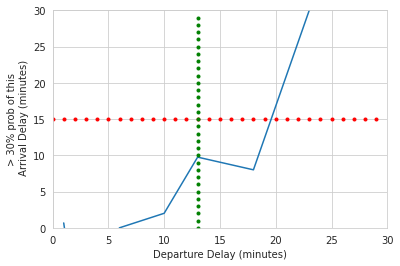

In [113]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(0, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(0, 30)
x = np.ones_like(y) * 13
ax.plot(x, y, 'g.');

In [ ]:
#if your departure delay is 19 min more tha your 30% likelihood of arrival >15
#you will cancel meeting if likelyhood 30 % or more
#here data is  normally distributed

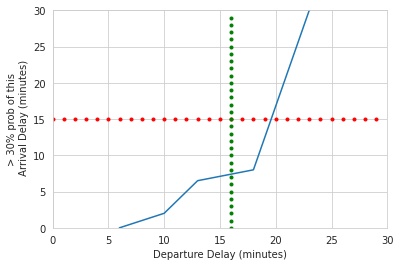

In [ ]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(0, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(0, 30)
x = np.ones_like(y) * 16
ax.plot(x, y, 'g.');

In [ ]:
%pip freeze

In [110]:
%pip install google-cloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
#test model


ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7faa68640d30>)


In [135]:
%%sql
SELECT
  SUM(case when DEP_DELAY < 16  AND arr_delay < 15  then 1 else 0 end ) AS correct_nocancel,
  SUM(case when DEP_DELAY < 16  AND arr_delay >= 15  then 1 else 0 end ) AS wrong_nocancel,
  SUM(case when DEP_DELAY >= 16  AND arr_delay <15  then 1 else 0 end ) AS wrong_cancel,
  SUM(case when DEP_DELAY >= 16  AND arr_delay >= 15  then 1 else 0 end ) AS correct_cancel

FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    flights_view_

 
)

 * sqlite:///mydb_
Done.


correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
27,0,1,2
